#constellate: ignore

If you're looking at this, it means you're looking at the Jupyter notebook and not the Constellation. If you want to be looking at the output and not the backstage action, you should probably be looking at the Constellation, hosted [here](https://constellate.vercel.app/constellate-tutorial/0).

$$
% This is the LaTeX preamble used in Constellate, with the small difference that the colors are adjusted based on the dark/light theme.
% It's used here so that the macros will show up correctly in VSCode (May 2022 insiders build), although I'm not sure it will work
% in other environments.
\providecommand{\R}{{\mathbb{R}}}
\providecommand{\Q}{{\mathbb{Q}}}
\providecommand{\N}{{\mathbb{N}}}
\providecommand{\C}{{\mathbb{C}}}

\providecommand{\cblue}[1]{\textcolor{147eb3}{#1}}
\providecommand{\cgreen}[1]{\textcolor{29a634}{#1}}
\providecommand{\cyellow}[1]{\textcolor{d1980b}{#1}}
\providecommand{\cred}[1]{\textcolor{d33d17}{#1}}
\providecommand{\cpurple}[1]{\textcolor{9d3f9d}{#1}}
\providecommand{\cteal}[1]{\textcolor{00a396}{#1}}
\providecommand{\cpink}[1]{\textcolor{db2c6f}{#1}}
\providecommand{\clime}[1]{\textcolor{8eb125}{#1}}
\providecommand{\cbrown}[1]{\textcolor{946638}{#1}}
\providecommand{\cindigo}[1]{\textcolor{7961db}{#1}}

\providecommand{\cone}[1]{\textcolor{147eb3}{#1}}
\providecommand{\ctwo}[1]{\textcolor{29a634}{#1}}
\providecommand{\cthree}[1]{\textcolor{d1980b}{#1}}
\providecommand{\cfour}[1]{\textcolor{d33d17}{#1}}
\providecommand{\cfive}[1]{\textcolor{9d3f9d}{#1}}
\providecommand{\csix}[1]{\textcolor{00a396}{#1}}
\providecommand{\cseven}[1]{\textcolor{db2c6f}{#1}}
\providecommand{\ceight}[1]{\textcolor{8eb125}{#1}}
\providecommand{\cnine}[1]{\textcolor{946638}{#1}}
\providecommand{\cten}[1]{\textcolor{7961db}{#1}}
$$

# Constellate Tutorial

This Constellation demonstrates all of Constellate's features and the few things you need to know to get the output you want. Like all Constellations, this one is generated entirely from a Jupyter notebook: see what that notebook looks like [here](https://github.com/constellate-org/constellate/blob/main/docs/constellate-tutorial.ipynb).

A Constellation is made up of *stars*, which are rendered as single web pages. There are many different types of stars, but most of them combine some text, as a Markdown cell, with some kind of visual, as a Python cell. Because this is a Markdown cell that isn't followed up by any kind of visual or code, it renders as a standalone Markdown star.

Press <kbd>?</kbd> to see some useful keyboard shortcuts for navigating Constellations. To go to the next page, for instance, press <kbd>n</kbd>.

## Document Structure

Constellate automatically parses notebooks, determining how to render each cell and filling out a larger document structure to make a table of contents. (Click the menu or press <kbd>M</kbd> to see that.) As much as Constellate tries to do what you want, it needs some help: let's see how to set things up so everything goes smoothly.

### Sections and Subsections

There are three levels of structure that Constellate supports:
 - The top-level heading, `# Constellate Tutorial`, is used as the title of the Constellation. There should be only one of these per document, ideally in the first Markdown cell.
 - Second-level headings, like `## Document Structure`, define sections. These show up in the table of contents: clicking the link will send you back to this cell.
 - Third-level headings, like `### Sections and Subsections`, define subsections. These only show up in the table of contents when the reader is inside the containing section: you can see "Sections and Subsections" inside the table of contents now, but the third-level headings for other sections won't appear.

For now, only use one of these per cell.

### Constellate Directives

Ideally Constellate could produce the output you want with any Jupyter notebook without any kind of extra information. However, in some cases Constellate can't deduce what you want and you have to add some extra information. That extra information is given in the form of *directives*. Directives are lines at the beginning of cells that start with `#constellate: `. Here are the directives Constellate currently uses:

- `#constellate: ignore` makes Constellate ignore the cell it appears in. It won't affect document structure or render at all. This can be used for cells that set up some aspect of the Jupyter notebook environment, like installing packages, or whenever you want to do something without it rendering in the output.
- `#constellate: setup` marks a cell as a *setup cell*. Setup cells contain Python code that is run before plots are generated. Use it to import libraries, define custom functions, set constants, or whatever else. These cells do not appear in the final output and do not affect document structure. They are run in the order they appear, but they are all run before generating a plot: this means that setup cells can affect the output of cells that are before them in the notebook.
- `#constellate: latex` indicates that a Markdown cell should be rendered as an image of LaTeX and not as a separate text cell. (This will be explained in more detail later.)
- `#constellate: setup_[backend]` marks a cell as a setup cell that only applies to a specific kind of plot. For example, `setup_matplotlib` is only run before Matplotlib output. Backends will be discussed in more detail later.

## Markdown Formatting

Markdown is the core textual format of documents. Constellate supports several bells and whistles on top of standard Markdown. If you want more customizability or different features, feel free to file a feature request. Here's a whirlwind tour of what syntax Constellate supports: the Markdown source is on the right.

Constellate uses [Elastic UI](https://elastic.github.io/eui/#/editors-syntax/markdown-format) for the core Markdown parsing, so it supports everything Elastic UI does. That page demonstrates all of the syntax: here are the highlights and the Constellate-specific stuff.

Text can be **bold**, *italic*, ***both***, ~~strikethrough~~, or `code`. Code blocks are supported, with copy buttons and syntax highlighting by default. Provide the language to ensure the highlighting looks good:

```js
function this_is_js_code() {
  if (0 != 1)  {
    console.log('Math still works');
  }
}
```

Importantly, **a single line break is not rendered as a new line: to set off a new paragraph, you need an empty line between paragraphs.** You may be used to some Markdown services that treat any newline character as a line break, but Constellate requires a double newline. 
This lets you keep line lengths short without forcing a bunch of individual paragraphs: see how this line looks in the source code.

| Tables | Are Cool | Right Aligned (note the colon in the markup!) |
| ------ | -------- | -------------:|
| Some | Data | 12 |
| More | Cells | 40 |
| Total | Up | 52 |

 - Unordered lists can be made with hyphens or asterisks.
   - Levels of nesting are supported.
     - And deeper still...

1. Ordered lists are also supported.
1. The numbers don't matter, as they're auto-incremented properly.
    1. These can be nested too.
        1. Using four spaces...

________________________

Horizontal rules can be made using underscores or hyphens.

> This is what a blockquote looks like, using `>` before each line.
> 
> —Someone at some point, probably

#### The first three levels of headers impact the document structure, but you can use other headers freely.
##### H5
###### H6

[Links look like this.](https://www.akc.org/dog-breeds/bernese-mountain-dog/) `[link text](link URL)`

Links to image URLs will display inline if you add a `!` before:

![Image alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Bernese_Mountain_DOg.jpg/1280px-Bernese_Mountain_DOg.jpg)

-------------------

Now the stuff Constellate tacks on:

$\LaTeX$ can be used[^1], both inline like $\mathrm{this}$ using single dollar signs or display mode using two:

$$
\mathrm{This\ equation\ will\ be\ centered\ and\ big.} \\
\int_{-\infty}^{\infty} e^{-x^2}\, dx = \sqrt{\pi}
$$

You can include raw HTML for more control, although whenever possible try to use Markdown to make sure your output is styled correctly. For example, you might <span style="font-style: italic;" class="text-blue">force a certain color</span>, even though this is generally discouraged.

[^1]:Constellate uses KaTeX, not MathJax, which is a small difference from how notebooks are rendered in the browser.

Everyone loves :joy: emojis! :sob: Either use the Unicode character directly, like 😂, or `:joy:`

[^any]: This definition even precedes its reference!

Footnotes are very nice to have.[^hi] You use `[^id]` for the footnote itself and `[^id]:` for the footnote definition.[^hover] It doesn't matter where you put the footnote definition[^any]: all of the footnotes will be put into a collapsible container at the bottom of the page. Hovering over footnotes will show the footnote, and clicking on them will open the container and scroll to them. Each footnote gets a link back as well.[^hi]

[^hi]: Here's an example. Note how there are two links to this footnote.

[^hover]: I can't vouch that this formatting will always look great, but $\LaTeX$ and *standard markup* are supported.

There are a couple automated transformations that make writing text easier. The straight apostrophe and double quote become the curled versions, like 'so' and "so"; `--` becomes --; and `...` becomes ..., the ellipsis character.

````markdown
## Markdown Formatting

Markdown is the core textual format of documents. Constellate supports several bells and whistles on top of standard Markdown. If you want more customizability or different features, feel free to file a feature request. Here's a whirlwind tour of what syntax Constellate supports: the Markdown source is on the right.

Constellate uses [Elastic UI](https://elastic.github.io/eui/#/editors-syntax/markdown-format) for the core Markdown parsing, so it supports everything Elastic UI does. That page demonstrates all of the syntax: here are the highlights and the Constellate-specific stuff.

Text can be **bold**, *italic*, ***both***, ~~strikethrough~~, or `code`. Code blocks are supported, with copy buttons and syntax highlighting by default. Provide the language to ensure the highlighting looks good:

```js
function this_is_js_code() {
  if (0 != 1)  {
    console.log('Math still works');
  }
}
```

Importantly, **a single line break is not rendered as a new line: to set off a new paragraph, you need an empty line between paragraphs.** You may be used to some Markdown services that treat any newline character as a line break, but Constellate requires a double newline. 
This lets you keep line lengths short without forcing a bunch of individual paragraphs: see how this line looks in the source code.

| Tables | Are Cool | Right Aligned (note the colon in the markup!) |
| ------ | -------- | -------------:|
| Some | Data | 12 |
| More | Cells | 40 |
| Total | Up | 52 |

 - Unordered lists can be made with hyphens or asterisks.
   - Levels of nesting are supported.
     - And deeper still...

1. Ordered lists are also supported.
1. The numbers don't matter, as they're auto-incremented properly.
    1. These can be nested too.
        1. Using four spaces...

________________________

Horizontal rules can be made using underscores or hyphens.

> This is what a blockquote looks like, using `>` before each line.
> 
> —Someone at some point, probably

#### The first three levels of headers impact the document structure, but you can use other headers freely.
##### H5
###### H6

[Links look like this.](https://www.akc.org/dog-breeds/bernese-mountain-dog/) `[link text](link URL)`

Links to image URLs will display inline if you add a `!` before:

![Image alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Bernese_Mountain_DOg.jpg/1280px-Bernese_Mountain_DOg.jpg)

-------------------

Now the stuff Constellate tacks on:

$\LaTeX$ can be used[^1], both inline like $\mathrm{this}$ using single dollar signs or display mode using two:

$$
\mathrm{This\ equation\ will\ be\ centered\ and\ big.} \\
\int_{-\infty}^{\infty} e^{-x^2}\, dx = \sqrt{\pi}
$$

You can include raw HTML for more control, although whenever possible try to use Markdown to make sure your output is styled correctly. For example, you might <span style="font-style: italic;" class="text-blue">force a certain color</span>, even though this is generally discouraged.

[^1]:Constellate uses KaTeX, not MathJax, which is a small difference from how notebooks are rendered in the browser.

Everyone loves :joy: emojis! :sob: Either use the Unicode character directly, like 😂, or `:joy:`

[^any]: This definition even precedes its reference!

Footnotes are very nice to have.[^hi] You use `[^id]` for the footnote itself and `[^id]:` for the footnote definition.[^hover] It doesn't matter where you put the footnote definition[^any]: all of the footnotes will be put into a collapsible container at the bottom of the page. Hovering over footnotes will show the footnote, and clicking on them will open the container and scroll to them. Each footnote gets a link back as well.[^hi]

[^hi]: Here's an example. Note how there are two links to this footnote.

[^hover]: I can't vouch that this formatting will always look great, but $\LaTeX$ and *standard markup* are supported.

There are a couple automated transformations that make writing text easier. The straight apostrophe and double quote become the curled versions, like 'so' and "so"; `--` becomes --; and `...` becomes ..., the ellipsis character.
````

## Constellate Stars

Rendering Markdown alone, like this page, isn't particularly noteworthy. What makes Constellate unique is its ability to render other kinds of Jupyter notebook content. Multiple Jupyter notebook cells can combine to form a single *star*: a single page in the final output. This section will explain each star type and how they work.

### Pure Markdown
A pure Markdown star is generated whenever a Markdown cell appears before another Markdown cell. This is a pure Markdown star—it's rendered as a centered block of text with nothing else.

### LaTeX

If a Markdown cell is followed by a Markdown cell that has the `#constellate: latex` directive in it, that second cell will be rendered and shown in the side panel. As the name suggests, this is primarily intended to allow for displaying equations on the right without breaking the flow of the document.[^1]

As an example, to the right I have a fairly famous equation. It's a bit long to include in the middle of this text, but it's nice as a side panel. Note there are custom Constellate LaTeX commands that color the output: these can be used to easily reference something, like the determinant <span class="text-blue">$b^2 - 4ac$</span>.

[^1]: Without the directive, Constellate sees a Markdown cell followed by a Markdown cell and will render a pure Markdown star. Although this is intended for LaTeX output, you can use this directive to render any kind of Markdown content side-by-side.

#constellate: latex
$$
% The standard align* doesn't work well in KaTeX because we're already in math mode, so this is a good substitute
\begin{aligned}
ax^2 + bx + c &= 0 \\
x &= \frac{-b \pm \sqrt{\cblue{b^2 - 4ac}}}{2a}  \\
\end{aligned}
$$

In [1]:
#constellate: setup_matplotlib
# This cell will be run before Matplotlib plots are generated.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import rho_plus

# this is basically what gets run before each execution in Constellate, once with IS_DARK True and once False
# set it to whatever matches the theme of your notebook editor so the plots don't hurt your eyes!
IS_DARK = True
theme, cs = rho_plus.mpl_setup(IS_DARK, setup=True)
plt.style.use(theme)

<Figure size 432x288 with 0 Axes>

### Matplotlib

If a Markdown cell is followed by a Python cell that generates PNG output, it's assumed that the output is a Matplotlib-based diagram. Constellate will then display that PNG image in the side panel, along with the code that generated it. Constellate's first-class support of dark mode shines here: Constellate will generate a light and dark version of each plot separately and display the appropriate one.[^1] Note how the colors change with dark mode: the dark blue becomes a lighter blue that still maintains contrast with the background.

On the right is a complicated figure that shows off the default Constellate theming. Note how a `#constellate: setup_matplotlib` directive keeps the stock imports out of the cell, as they are in most notebooks, so the code is just the relevant part that actually makes the plot. The code will be formatted using `black`, so don't worry about the formatting too much in the notebook.

[^1]: One consequence of this is that hardcoding colors will not look good: if you write text using a hardcoded color like `'black'`, it'll be unreadable in dark mode. `c1` through `c10` will be the colors in the color cycle (the whole list will be `cs`), which will adapt to the mode. For example, `c1` is a blue that will adjust to match the theme. Other parts of the plot theme are also set before running the cell, so using `plt.rcParams['text.color']` will be an appropriate text color regardless of mode. The constant `IS_DARK` is also set before running the cell, so if you need to you can use that.

Text(0.5, 0.98, 'Matplotlib/Seaborn Demo')

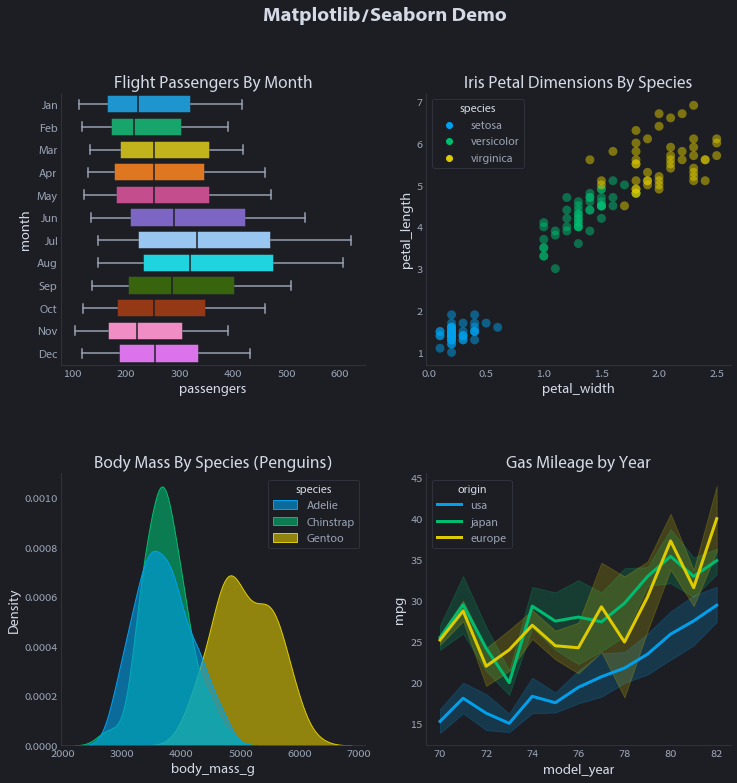

In [3]:
# This is what the setup code was. It sets up the theming in the notebook (so the plots don't 
# hurt your eyes as you write the notebook) and does the standard imports.
# #constellate: setup_matplotlib
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import colorcet as cc
# import rho_plus
# IS_DARK = False
# theme, cs = rho_plus.mpl_setup(IS_DARK, setup=True)
# plt.style.use(theme)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), gridspec_kw=dict(hspace=0.4, wspace=0.2))
flights = sns.load_dataset('flights')
sns.boxplot(data=flights, x='passengers', y='month', orient='h', ax=ax1, **rho_plus.boxstyle())
ax1.set_title('Flight Passengers By Month')

iris = sns.load_dataset('iris')
sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species', legend=True, ax=ax2, edgecolor='none', alpha=0.5, s=80)
ax2.set_title('Iris Petal Dimensions By Species')

penguins = sns.load_dataset('penguins')
sns.kdeplot(data=penguins, hue='species', x='body_mass_g', fill=True, common_norm=False, ax=ax3, alpha=0.6)
ax3.set_title('Body Mass By Species (Penguins)')

mpg = sns.load_dataset('mpg')
sns.lineplot(data=mpg, x='model_year', y='mpg', hue='origin', ax=ax4)
ax4.set_title('Gas Mileage by Year')

fig.suptitle('Matplotlib/Seaborn Demo')

### Plotly
If a cell has Plotly output, that output will be displayed in the side panel. Unlike matplotlib, this allows interactivity. There are a couple differences from the `matplotlib` renderer to know about:
- Plotly cells aren't re-run by Constellate: the output data from the cell itself is used.[^1] This means that `setup_plotly` cells have no effect, and unlike `matplotlib` you cannot customize the output using `IS_DARK` or the named colors. You also have to run the cell in order for Constellate to see the output.
- Dark mode compatibility is achieved by modifying the plotly template used to render the figure. This may overwrite some of your own styling: a fix for this is currently being considered.

To demonstrate, here's a 3D visual that benefits tremendously from the ability to rotate the camera.

[^1]: The reason for this is that Plotly has no concept of the current figure in the way that Matplotlib does, so Constellate wouldn't know what figure to render if it re-ran the cell. A technical workaround for this is in progress.

In [10]:
import plotly.graph_objects as go

# equations credit to https://mathcurve.com/surfaces.gb/klein/klein.shtml
a = 3
b = 4
c = 2
def r(u):
    return c * (1 - 0.5 * np.cos(u))

# I change the z and y axes and flip the z axis so the bottle is oriented the nicest
Nd = 50
uu, vv = np.meshgrid(np.linspace(0, 2 * np.pi, Nd), np.linspace(0, 2 * np.pi, Nd))

xx = np.where(uu < np.pi, np.cos(uu) * (a * (1 + np.sin(uu)) + r(uu) * np.cos(vv)), a * (1 + np.sin(uu)) * np.cos(uu) - r(uu) * np.cos(vv))
zz = -np.where(uu < np.pi, np.sin(uu) * (b + r(uu) * np.cos(vv)), b * np.sin(uu))
yy = np.where(uu < np.pi, r(uu) * np.sin(vv), r(uu) * np.sin(vv))

fig = go.Figure(data=[
    go.Surface(x=xx, y=yy, z=zz, autocolorscale=False)
])
fig.update_layout(title_text=r'$\text{Klein Bottle in } \mathbb{R}^3$')
fig.show()

### Bokeh and Friends

The [HoloViz team](https://holoviz.org/) has a set of tools (`bokeh`, `panel`, `holoviews`, etc.) that enable powerful interactive functionality in the Jupyter notebook. Because the tools can be backed by Python servers, you can support visualizations using arbitrary Python code and arbitrary data. For example, you can show the output of a machine learning model trained in Tensorflow or PyTorch without having to port that code to Javascript. One of the features that sets Constellate apart is seamlessly handling these interactive webapps just as it handles static images or JS-driven interactivity.

Here's an example Panel app that displays a beta distribution and lets you change the parameters.

In [4]:
#constellate: setup_panel
import numpy as np
from scipy import stats
import bokeh
import param
import panel as pn
import matplotlib.pyplot as plt

pn.extension('katex')

In [5]:
# here's the setup cell I'm using, for clarity:

# #constellate: setup_panel
# import numpy as np
# from scipy import stats
# import bokeh
# import param
# import panel as pn
# import matplotlib.pyplot as plt
# pn.extension('katex')


class BetaDist(param.Parameterized):
    colorMode = param.ObjectSelector(["dark", "light"], precedence=-1)
    mu = param.Number(label='μ', default=0.3, bounds=(0, 1), step=0.01)
    nu = param.Number(label='ν', default=10, bounds=(1, 100), step=1)

    def __init__(self):
        super().__init__()
        if 'colorMode' in pn.state.session_args:
            self.colorMode = pn.state.session_args["colorMode"][0].decode().lower()
        else:
            self.colorMode = 'dark'

    @pn.depends("colorMode")
    def colors_theme(self):
        if self.colorMode == "light":
            plt.style.use("rho-light")
        else:
            plt.style.use("rho-dark")
        colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
        theme = bokeh.themes.Theme(
            f"/home/nicholas/programs/rho-themes/themes/panel/eui/{self.colorMode}.yml"
        )
        return (colors, theme)

    @pn.depends("colorMode", "mu", "nu")
    def plot(self):
        cs, theme = self.colors_theme()
        xx = np.linspace(0, 1, 100)
        alpha = self.mu * self.nu
        beta = (1 - self.mu) * self.nu
        yy = stats.beta(alpha, beta).pdf(xx)
        p = bokeh.plotting.figure(x_range=(0, 1), y_range=(0, max(6, np.nanmax(yy, initial=0.1))), title='Beta Distribution')
        p.line(x=xx, y=yy, color=cs[0], width=4)
        return pn.pane.Bokeh(p, theme=theme, sizing_mode='scale_both')


model = BetaDist()

app = pn.Row(pn.Param(model, name='Beta Distribution'), model.plot, sizing_mode='scale_both')
app.servable('Beta Distribution')

BokehModel(combine_events=True, render_bundle={'docs_json': {'7cae7643-3c9f-453a-80ae-38606c428f47': {'defs': …

Row(sizing_mode='scale_both')
    [0] Param(BetaDist, name='Beta Distribution')
    [1] ParamMethod(method)

### Data Tables

If a Python cell outputs a Pandas DataFrame, then Constellate will show the table using a fairly sophisticated component. Some features to note:
- Numbers, booleans, datetimes, currencies, and JSON are automatically recognized: note how the numeric columns, including the dollar values, are right-aligned while everything else is left-aligned. This also allows for intelligent sorting behavior.
- Pagination is automatic, allowing for a relatively efficient render even for large datasets.
  - Note that, while Constellate's DataFrame rendering scales relatively well, it still keeps the entire dataset in memory and sends it to the client when they load the page. Anything not on the first page doesn't have to be rendered, but it does have to be sent to the browser, which will cripple load times for very large datasets. Instead, use a `Tabulator` widget as a Panel plot, which can send a server request to get more data.

Like Plotly, Constellate has to guess what the DataFrame value is: there's no "current DataFrame" feature in Pandas. The heuristic Constellate applies is simple: the last non-empty line is assumed to be the one that produces the DataFrame. This is usually correct, but is not bulletproof, and so be aware that you will most likely run into issues if you do things like display a DataFrame manually instead of simply having it be the last expression. To make sure Constellate knows exactly what to do, give it a directive: `#constellate: dataframe [expr]` where `expr` is a Python expression to be run after the cell that produces a DataFrame. The code for this Star would produce the same results if I had started with `#constellate: dataframe` or `#constellate: dataframe exch`.

In [6]:
import numpy as np
import pandas as pd

# source https://www.kaggle.com/datasets/ruchi798/currency-exchange-rates
exch = pd.read_csv('https://gist.githubusercontent.com/nicholas-miklaucic/018e22f3e2830e276a10603d117a7c90/raw/', index_col='index').reset_index(drop=True)
exch.rename(columns={'currency': 'currency_code'}, inplace=True)
exch[['country', 'currency_name']] = exch['Country/Currency'].str.strip().str.rsplit(' ', n=1, expand=True)
exch['currency_name'] = np.where(exch['currency_name'], exch['currency_name'], exch['country'])
exch['is_dollar'] = exch['currency_name'].str.lower() == 'dollar'
exch.drop(columns=['Country/Currency'], inplace=True)
exch['date'] = pd.to_datetime(exch['date'], dayfirst=True)

# comment this to really make Constellate work!
exch = exch[exch.date > pd.to_datetime('2022-05-13')]

exch['inverse'] = 1 / exch['value']
exch['value'] = [f'${v}' for v in exch['value']]

# because I didn't specify, the last non-empty line is assumed to be the DataFrame expression
exch

,currency_code,value,date,country,currency_name,is_dollar,inverse
22348,AUD,$1.500101,2022-05-14,Australia,Dollar,True,0.666622
22349,GBP,$0.848814,2022-05-14,Great Britain,Pound,False,1.178114
22350,EUR,$1.0,2022-05-14,Euro,Euro,False,1.000000
22351,JPY,$134.573925,2022-05-14,Japan,Yen,False,0.007431
22352,CHF,$1.042767,2022-05-14,Switzerland,Franc,False,0.958987
...,...,...,...,...,...,...,...
22943,AED,$3.837419,2022-05-17,United Arab Emirates,Dirham,False,0.260592
22944,VUV,$119.377407,2022-05-17,Vanuatu,Vatu,False,0.008377
22945,VND,$24130.780668,2022-05-17,Vietnam,Dong,False,0.000041
22946,YER,$261.496969,2022-05-17,Yemen,Rial,False,0.003824


### Vega/Altair

Altair cells which output Vega charts are rendered interactively in the browser. Due to limitations of Vega, making these responsive is a work in progress.

The same rules apply as for Plotly: the output of the cell is what matters, not the code in the cell. The Vega theme is adapted to both light and dark mode: this means that setting your own theming or using hardcoded colors is discouraged.

In [7]:
import altair as alt

source = pd.read_json('https://cdn.jsdelivr.net/npm/vega-datasets@2/data/penguins.json')

brush = alt.selection(type='interval', resolve='global')
species = alt.selection_multi(fields=['Species'], bind='legend')


base: alt.Chart = alt.Chart(source)

scatter = base.mark_point().encode(
    color=alt.condition(brush, 'Species:N', alt.ColorValue('gray')),
    tooltip=list(source.columns),
    opacity=alt.condition(species, alt.value(1), alt.value(0.2)),
    shape=alt.Shape('Island:N')
).add_selection(
    brush, species
).properties(
    width=600,
    height=300    
)

chart: alt.Chart = (scatter.encode(x=alt.X('Beak Length (mm)', scale=alt.Scale(zero=False)), y=alt.Y('Beak Depth (mm)', scale=alt.Scale(zero=False))) &
scatter.encode(x=alt.X('Flipper Length (mm)', scale=alt.Scale(zero=False)), y=alt.Y('Body Mass (g)', scale=alt.Scale(zero=False))) )

chart.properties(title='Penguin Biometrics')

alt.VConcatChart(...)